# Comparison of weighted Kemeny with different training methods

In [3]:
%load_ext autoreload
%autoreload 2
import sys
import os
root_path = '../../'
sys.path.append(os.path.join(root_path, 'code', 'core'))


from ranking_utils import *
from mallows import *
from ws_ranking import *
import numpy as np

from synth_exp_utils import *
import pickle

import matplotlib
import matplotlib.pyplot as plt
plt.rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generate synthetic theta

In [4]:

d=10
n = 250
max_m = 18

np.random.seed(0)

theta_star = np.zeros(18)

theta_star[:10] = np.random.uniform(0.1,0.2,10)
theta_star[10:] = np.random.uniform(2,5,8)

lst_m = np.arange(2,19,2)
print(lst_m)
lst_out = []
trials = 5
np.sort(theta_star)
print(theta_star)
np.random.shuffle(theta_star)

[ 2  4  6  8 10 12 14 16 18]
[0.15488135 0.17151894 0.16027634 0.15448832 0.14236548 0.16458941
 0.14375872 0.1891773  0.19636628 0.13834415 4.37517511 3.58668476
 3.70413368 4.77678991 2.21310817 2.2613879  2.06065519 4.49785954]


# Run experiments

In [5]:
for t in range(trials):
    lst_trial_out = []
    Y = generate_true_rankings(d,n)
    L = sample_mallows_LFs(Y,max_m,theta_star)
    lst_D = get_pair_wise_dists(L)
    theta_hat = estimate_theta(L) 
    for m in lst_m:
        lst_trial_out.append(run_kemeny_inferences(Y,L,theta_star,theta_hat,m, lst_D))
    o = collect_outs(lst_trial_out)
    lst_out.append({'trial_out':o})



In [6]:
print(theta_hat)
print(theta_star)
print(np.linalg.norm(theta_hat-theta_star,1)/18)

[2.22706531 3.50820019 0.45444614 0.42685297 0.44653746 3.55163468
 2.26594511 0.46812803 0.42811455 4.36137402 4.43214702 0.42748339
 0.46023366 0.424757   0.1997113  0.44588379 4.5084217  2.23052693]
[2.21310817 3.70413368 0.1891773  0.14236548 0.16458941 3.58668476
 2.06065519 0.14375872 0.13834415 4.37517511 4.77678991 0.17151894
 0.19636628 0.15448832 0.16027634 0.15488135 4.49785954 2.2613879 ]
0.18980443257972848


In [9]:
# result save
key = 'd_{}_n_{}_m_{}_trials_{}_theta_shuffle_false_sum'.format(d,n,m,trials) 
fpath = os.path.join('outputs', '{}.pkl'.format(key))
pickle.dump(lst_out,open(fpath,'wb'))

In [10]:
# Visualize results

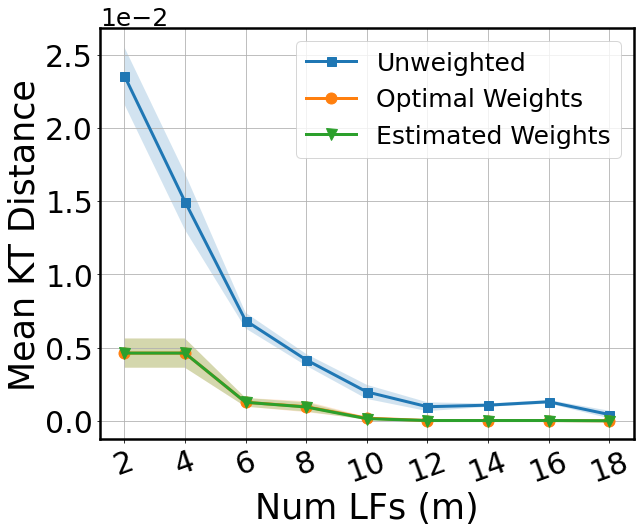

In [11]:
lst_out_ = [x['trial_out'] for x in lst_out]
out = collect_outs(lst_out_)
out = mean_std(out)

l1 = out['mean_0_lst_lst_mean_kt_unwtd_kemeny']
l2 = out['mean_0_lst_lst_mean_kt_wtd_kemeny_opt']
l3 = out['mean_0_lst_lst_mean_kt_wtd_kemeny_hat']

e1 = out['std_0_lst_lst_mean_kt_unwtd_kemeny']
e2 = out['std_0_lst_lst_mean_kt_wtd_kemeny_opt']
e3 = out['std_0_lst_lst_mean_kt_wtd_kemeny_hat']

fig = plt.figure(figsize=(9, 7.5))
ax = plt.subplot(111)

#plt.yscale('log')
ax.plot(lst_m,l1,marker='s',label='Unweighted',linewidth=3,markersize=9)
ax.plot(lst_m,l2,marker='o',label='Optimal Weights',linewidth=3,markersize=11) 
ax.plot(lst_m,l3,marker='v',label='Estimated Weights',linewidth=3,markersize=11)

ax.fill_between(lst_m,np.clip(l1-e1,0,100),l1+e1,alpha=0.2)
ax.fill_between(lst_m,np.clip(l2-e2,0,100),l2+e2,alpha=0.2)
ax.fill_between(lst_m,np.clip(l3-e3,0,100),l3+e3,alpha=0.2)

plt.xticks(lst_m,size=30, rotation=20)
plt.yticks(size=30)


ax.xaxis.get_offset_text().set_fontsize(25)
ax.xaxis.get_offset_text().set_weight('bold')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,1))
ax.yaxis.offsetText.set_fontsize(25)

legend_properties = {'size':25}
ax.legend(prop=legend_properties)

plt.xlabel('Num LFs (m)',fontsize=35)
plt.ylabel('Mean KT Distance',fontsize=35) ## kt distance = (1- kt_corr(r1,r2))/2

plt.grid()
plt.tight_layout()

#plt.savefig('../plots/full-rankings-kemeny_{}_sum.pdf'.format(key),dpi=100)

# vary d  . # find setting where this gap is bigger
# do it over 10 random trials and plot means, std etc.

In [12]:
a = np.array(list(range(10)))
np.random.shuffle(a[3:])
print(a)

[0 1 2 8 4 7 5 9 6 3]


In [13]:
theta_star = -np.sort(-theta_star)
print(theta_star)

[4.77678991 4.49785954 4.37517511 3.70413368 3.58668476 2.2613879
 2.21310817 2.06065519 0.19636628 0.1891773  0.17151894 0.16458941
 0.16027634 0.15488135 0.15448832 0.14375872 0.14236548 0.13834415]
